In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [78]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

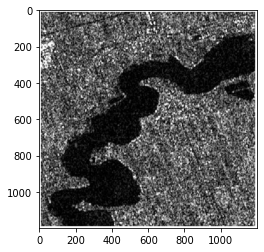

In [5]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [52]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

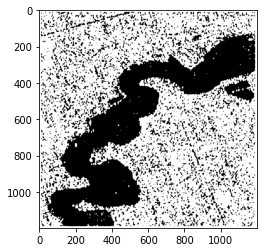

In [53]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [7]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

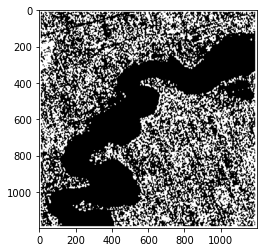

In [8]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [42]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


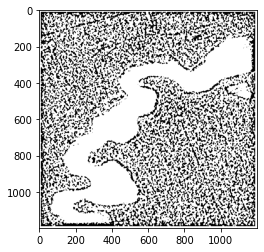

In [43]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [55]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

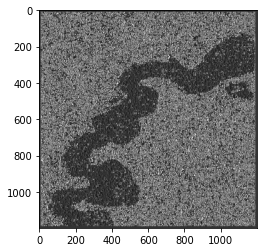

In [57]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

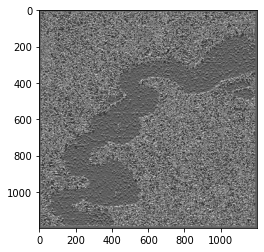

In [58]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [60]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

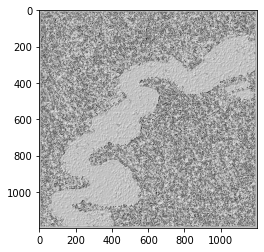

In [62]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [64]:
edges = cv2.Canny(image_gray,100,200)

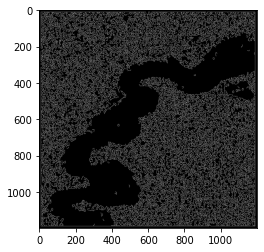

In [65]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [127]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

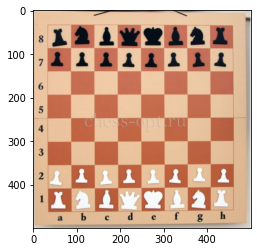

In [128]:
plt.imshow(image)

In [138]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [146]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [147]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

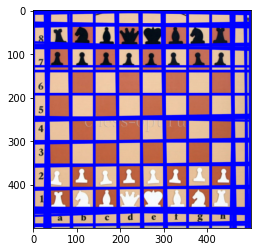

In [148]:
plt.imshow(image)

In [149]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

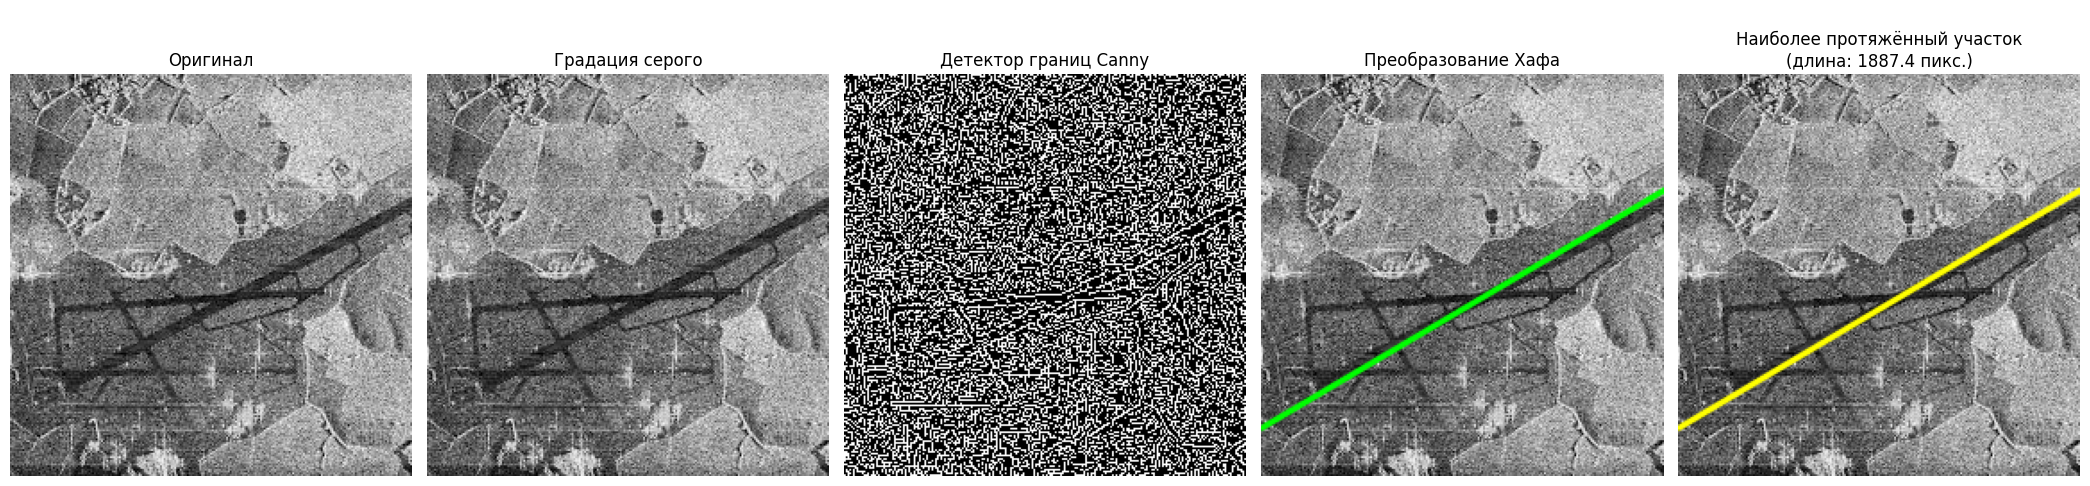

In [27]:
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Преобразование в оттенки серого
canny = cv2.Canny(image_gray, 50, 150, apertureSize=3) #Детектор границ Canny
lines = cv2.HoughLines(canny, 1, np.pi / 180, 175) #Преобразование Хафа

# Подготовка изображений для визуализации
lines_visualization = image.copy()
result = image.copy()

max_length = 0
longest_line_coords = None

# Поиск самой длинной линии
if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho

        # Формируем две точки на линии
        pt1 = (int(x0 + 1300 * (-b)), int(y0 + 800 * a))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 560 * a))
        cv2.line(lines_visualization, pt1, pt2, (0, 255, 0), 2, cv2.LINE_AA) # Рисуем все линии зелёным
        length = np.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2) # Длина линии

        if length > max_length:
            max_length = length
            longest_line_coords = (pt1, pt2)

# Отрисовка самой длинной линии желтым
if longest_line_coords is not None:
    cv2.line(result, longest_line_coords[0], longest_line_coords[1], (0, 255, 255), 2, cv2.LINE_AA)

plt.figure(figsize=(21, 5))

plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Оригинал')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Градация серого')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(canny, cmap='gray')
plt.title('Детектор границ Canny')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(lines_visualization, cv2.COLOR_BGR2RGB))
plt.title('Преобразование Хафа')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'\nНаиболее протяжённый участок\n(длина: {max_length:.1f} пикс.)')
plt.axis('off')

plt.tight_layout()
plt.show()


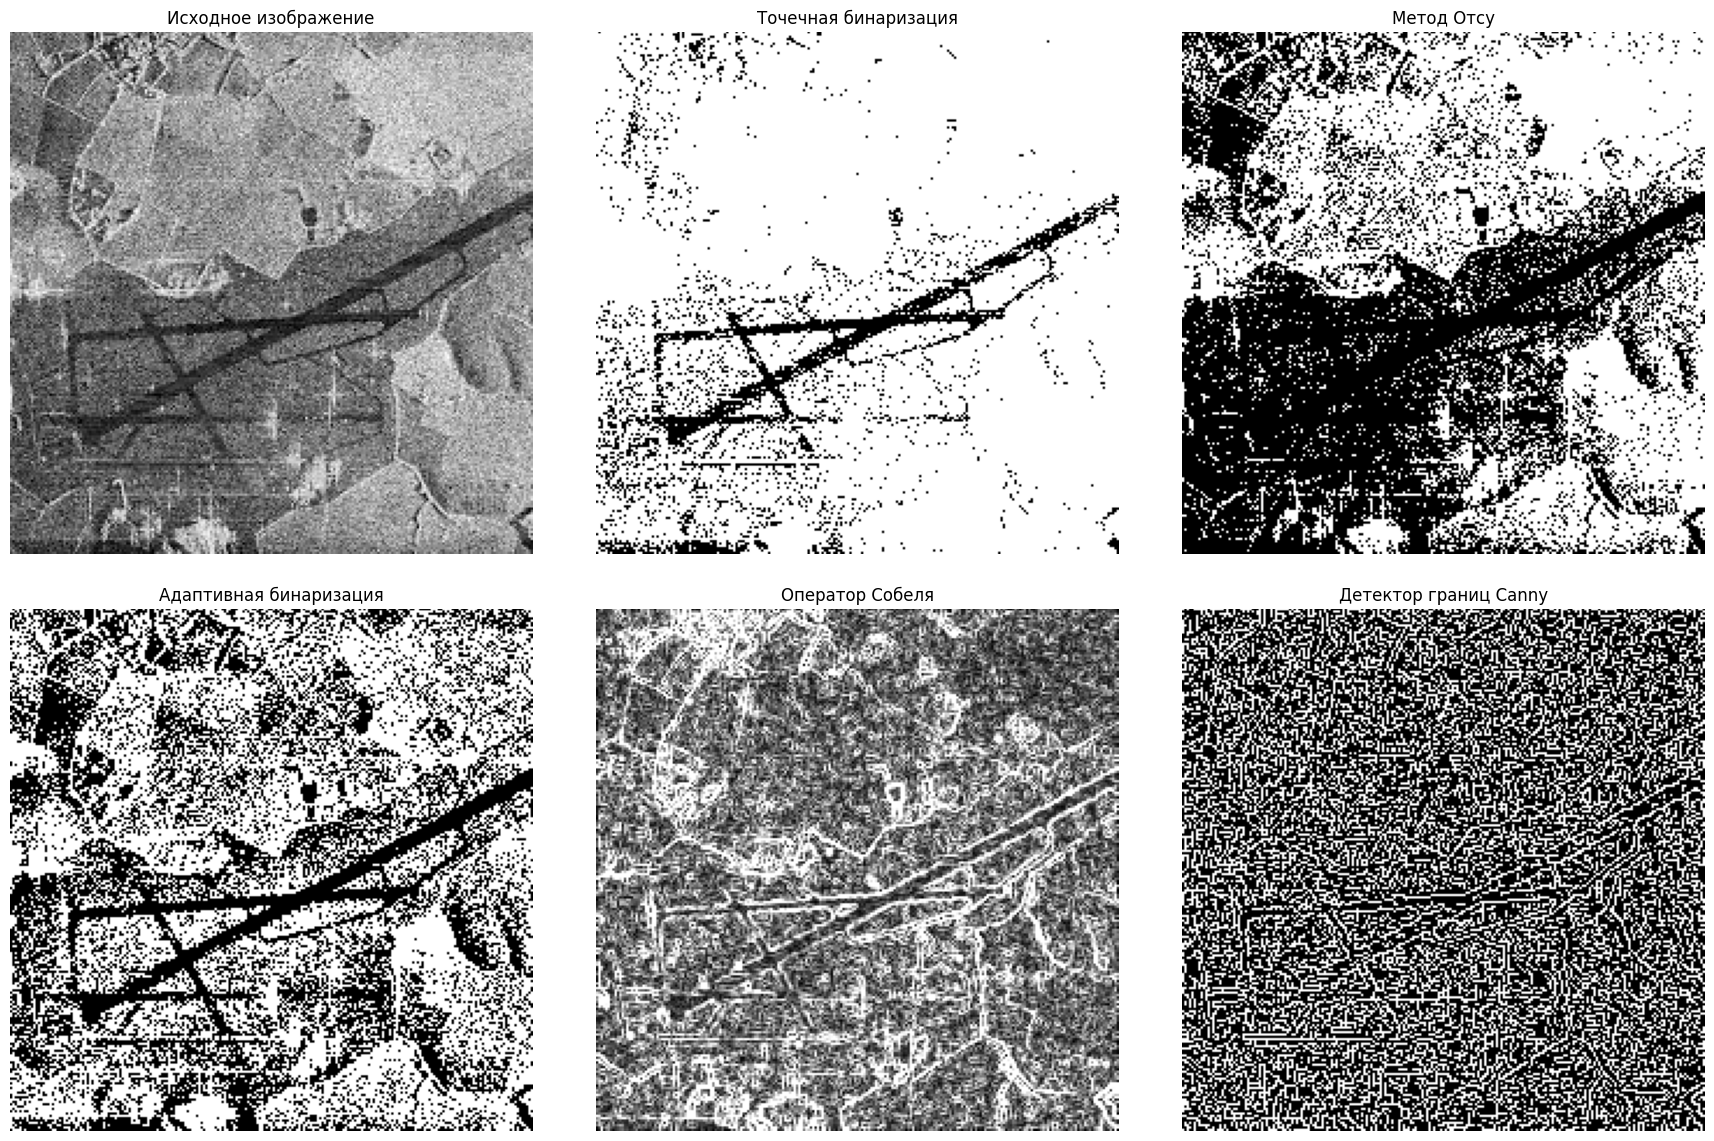

In [38]:
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации
#    и выделить участок дорожной полосы.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

image = cv2.imread('sar_3.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Точечная бинаризация
bin_img = copy.deepcopy(gray)
T  = 65
bin_img[gray < T] = 0
bin_img[gray >= T] = 255

#Метод Отсу
_, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Адаптивная бинаризация 
binary_adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)

# Оператор Собеля
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = cv2.magnitude(sobelx, sobely)
sobel_mag = cv2.convertScaleAbs(sobel_mag)

# Детектор границ Canny
edges = cv2.Canny(gray, 50, 150)


plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(bin_img, cmap='gray')
plt.title('Точечная бинаризация')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(binary_otsu, cmap='gray')
plt.title('Метод Отсу')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(binary_adaptive, cmap='gray')
plt.title('Адаптивная бинаризация')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Оператор Собеля')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(edges, cmap='gray')
plt.title('Детектор границ Canny')
plt.axis('off')

plt.tight_layout(pad = 3.0)
plt.show()
